In [1]:
# General Imports
import numpy as np

# Visualisation Imports
import matplotlib.pyplot as plt

# Scikit Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Hp\\Downloads\\uci-secom.csv\\uci-secom.csv")
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
# Find null
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [4]:
df.shape

(1567, 592)

In [5]:
pass_fail_counts = df['Pass/Fail'].value_counts()
print(pass_fail_counts)

-1    1463
 1     104
Name: Pass/Fail, dtype: int64


In [6]:
y = df['Pass/Fail']

In [7]:
X = df.drop(['Pass/Fail'],axis = "columns")
X.head()

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [8]:
X.shape

(1567, 591)

In [9]:
df = df.dropna(how = 'any', axis = 0)
df.isnull().sum()

Time         0.0
0            0.0
1            0.0
2            0.0
3            0.0
            ... 
586          0.0
587          0.0
588          0.0
589          0.0
Pass/Fail    0.0
Length: 592, dtype: float64

In [10]:
X = X.drop(columns=['Time'])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [11]:
X.shape

(1567, 590)

In [12]:
print("Shape of X before dropping missing values:", X.shape)

Shape of X before dropping missing values: (1567, 590)


In [13]:
# Calculate summary statistics of X before dropping missing values
print("Summary statistics of X before dropping missing values:")
print(X.describe())

Summary statistics of X before dropping missing values:
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897   

In [14]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation to your data
X_imputed = imputer.fit_transform(X)

# Create PCA instance and fit to imputed data
pca = PCA(n_components=590)
pca.fit(X_imputed)


PCA(n_components=590)

In [15]:
X_imputed.shape

(1567, 590)

In [16]:
print("Variance explained by all 590 principal components = ", sum(pca.explained_variance_ratio_ * 100))

Variance explained by all 590 principal components =  99.99999999999994


Text(0, 0.5, 'Explained variance')

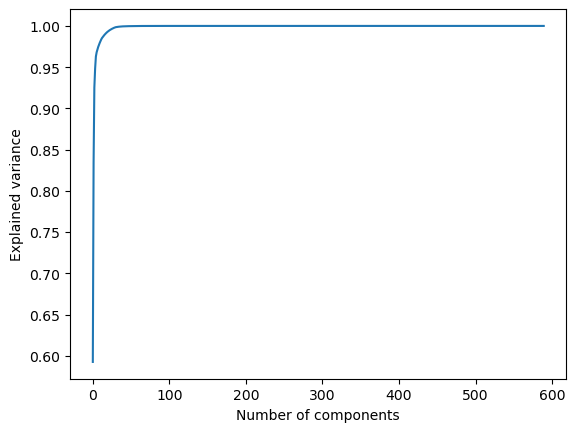

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [19]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation to your data
X_imputed = imputer.fit_transform(X)# Create an instance of SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation to your data
X_imputed = imputer.fit_transform(X)


# Create PCA instance and fit to imputed data
pca_2 = PCA(n_components=7)
pca_2.fit(X_imputed)


PCA(n_components=7)

In [20]:
print("Variance explained by all 7 principal components = ", sum(pca_2.explained_variance_ratio_ * 100))

Variance explained by all 7 principal components =  97.12913690448381


In [70]:
X_imputed.shape

(1567, 590)

In [73]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)
X_imputed_dense = X_imputed.toarray()

for n_components_pca in range(1, 13):
    pca_1 = PCA(n_components=n_components_pca)
    pca_1.fit(X_imputed_dense)

    explained_variance_ratios = pca_1.explained_variance_ratio_
    total_explained_variance = explained_variance_ratios.sum()

    print(f"Number of components: {n_components_pca}")
    print("Explained Variance Ratios:", explained_variance_ratios)
    print("Total Explained Variance:", total_explained_variance)
    print("=" * 30)


Number of components: 1
Explained Variance Ratios: [0.59254058]
Total Explained Variance: 0.5925405798334095
Number of components: 2
Explained Variance Ratios: [0.59254058 0.24123819]
Total Explained Variance: 0.8337787685294604
Number of components: 3
Explained Variance Ratios: [0.59254058 0.24123819 0.09150014]
Total Explained Variance: 0.925278904415969
Number of components: 4
Explained Variance Ratios: [0.59254058 0.24123819 0.09150014 0.02300579]
Total Explained Variance: 0.948284689589021
Number of components: 5
Explained Variance Ratios: [0.59254058 0.24123819 0.09150014 0.02300579 0.01459192]
Total Explained Variance: 0.9628766130473249
Number of components: 6
Explained Variance Ratios: [0.59254058 0.24123819 0.09150014 0.02300579 0.01459192 0.00518818]
Total Explained Variance: 0.9680647883750569
Number of components: 7
Explained Variance Ratios: [0.59254058 0.24123819 0.09150014 0.02300579 0.01459192 0.00518818
 0.00322658]
Total Explained Variance: 0.9712913693189479
Number 

In [21]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

# Create PCA instance and fit to imputed data
pca_1 = PCA(n_components=2)
pca_1.fit(X_imputed)

PCA(n_components=2)

In [22]:
print("Variance explained by all 2 principal components = ", sum(pca_2.explained_variance_ratio_ * 100))

Variance explained by all 2 principal components =  97.12913690448381


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an instance of SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation 
X_imputed = imputer.fit_transform(X)

lda_1 = LinearDiscriminantAnalysis()
lda_1.fit(X_imputed, y)

LinearDiscriminantAnalysis()

In [24]:
accuracy  = lda_1.score(X_imputed, y)
print("accuracy:", accuracy)

accuracy: 0.9738353541799617


In [49]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

In [50]:
X = csr_matrix(X_imputed)

In [53]:
svd = TruncatedSVD(n_components=13, n_iter=7, random_state=42)
svd.fit(X)

TruncatedSVD(n_components=13, n_iter=7, random_state=42)

In [54]:
print(svd.explained_variance_ratio_)

[0.14391297 0.48000936 0.21381373 0.09145237 0.02074217 0.0144525
 0.0051881  0.00322657 0.00303009 0.00253908 0.00231146 0.00212261
 0.00207103]


In [55]:
print(svd.explained_variance_ratio_.sum())

0.9848720232059793


In [56]:
from sklearn.decomposition import TruncatedSVD

for n_components in range(1, 13):
    svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
    svd.fit(X)
    
    explained_variance_ratio = svd.explained_variance_ratio_
    cumulative_explained_variance_ratio = explained_variance_ratio.sum()
    
    print(f"Number of Components: {n_components}")
    print("Explained Variance Ratio:", explained_variance_ratio)
    print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)
    print()

Number of Components: 1
Explained Variance Ratio: [0.14391297]
Cumulative Explained Variance Ratio: 0.1439129653020528

Number of Components: 2
Explained Variance Ratio: [0.14391297 0.48000936]
Cumulative Explained Variance Ratio: 0.6239223280218477

Number of Components: 3
Explained Variance Ratio: [0.14391297 0.48000936 0.21381373]
Cumulative Explained Variance Ratio: 0.8377360603526205

Number of Components: 4
Explained Variance Ratio: [0.14391297 0.48000936 0.21381373 0.09145237]
Cumulative Explained Variance Ratio: 0.9291884324190111

Number of Components: 5
Explained Variance Ratio: [0.14391297 0.48000936 0.21381373 0.09145237 0.02074217]
Cumulative Explained Variance Ratio: 0.9499305996665325

Number of Components: 6
Explained Variance Ratio: [0.14391297 0.48000936 0.21381373 0.09145237 0.02074217 0.0144525 ]
Cumulative Explained Variance Ratio: 0.9643830975691869

Number of Components: 7
Explained Variance Ratio: [0.14391297 0.48000936 0.21381373 0.09145237 0.02074217 0.0144525

In [128]:
pip install dwave-ocean-sdk

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install dwave-plugin-sklearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dwave-plugin-sklearn (from versions: none)
ERROR: No matching distribution found for dwave-plugin-sklearn


In [28]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [30]:
from dwave.plugins.sklearn import SelectFromQuadraticModel

# Classical Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Machine Learning Utilities
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np
import openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import plotly.express as px
from plotly.subplots import make_subplots
import dimod
from dwave.system import LeapHybridCQMSampler

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an instance of SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation to your data
X_imputed = imputer.fit_transform(X)

In [33]:
# Feature selection the easy way
X_new = SelectFromQuadraticModel(num_features = 7, alpha = 0.5).fit_transform(X_imputed,y)

In [39]:
def show_relevance_redundancy(X_imputed, y, indices = None, title = ""):
    if not indices is None:
        X_imputed = X_imputed.iloc[:,indices].copy()
    y = y
    fig = make_subplots(
        rows = 1,
        cols = 2,
        column_widths = [0.68, 0.32],
        column_titles = ["relevance", "redundancy"],
    )
    
    trace_rel = px.bar(np.array([abs(np.corrcoef(x,y)[0,1]) for x in X_imputed.values.T]))
    trace_red = px.imshow(abs(np.corrcoef(X_imputed.values, rowvar = False)))
    fig.add_trace(trace_rel.data[0], row = 1, col = 1)
    fig.add_trace(trace_red.data[0], row = 1, col = 2)
    fig.update_layout(width = 1200, height = 480, title = title)
    fig.show()

In [40]:
def evaluate_model(m, X_imputed, y, indices = None):
    if not indices is None:
        X_filtered = X_imputed.iloc[:, indices]
    else:
        X_filtered = X_imputed
    acc = np.mean(cross_val_score(clf, X_filtered, y, cv = 5))
    return acc

In [41]:
clf = RandomForestClassifier()

In [42]:
X_new_df = pd.DataFrame(data=X_new, columns=list(range(X_new.shape[1])))

show_relevance_redundancy(
    X_new_df,
    y,
    None,
    f"plugin optimization: acc={evaluate_model(clf, X_new_df, y, None):.4f}",
)

In [45]:
var = []
components = []

num_features = 13
for n in range(1,num_features):
    
    X_new = SelectFromQuadraticModel(num_features = n, alpha = 0.5).fit_transform(X_imputed,y)
    X_new_df = pd.DataFrame(data=X_new, columns=list(range(X_new.shape[1])))
    var.append(evaluate_model(clf, X_new_df, y, None))
    components.append(n)

In [46]:
components

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [47]:
var

[0.8405913595571926,
 0.8877658167314463,
 0.9234305366191163,
 0.9227956289045807,
 0.9087910298935716,
 0.9100649152438901,
 0.9164343419954823,
 0.9208929407215971,
 0.9177082273458008,
 0.9177082273458008,
 0.9215298833967562,
 0.8565617305305142]

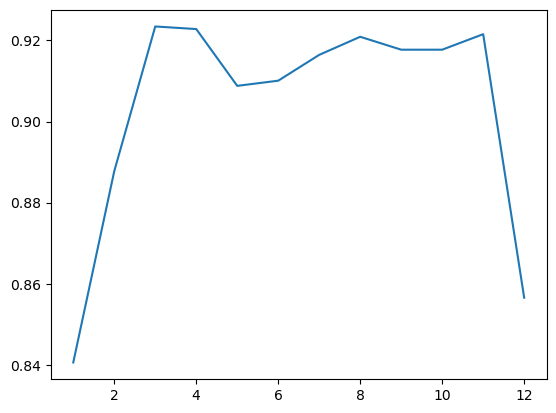

In [48]:
plt.plot(components, var)

In [29]:
pip install dwave-scikit-learn-plugin

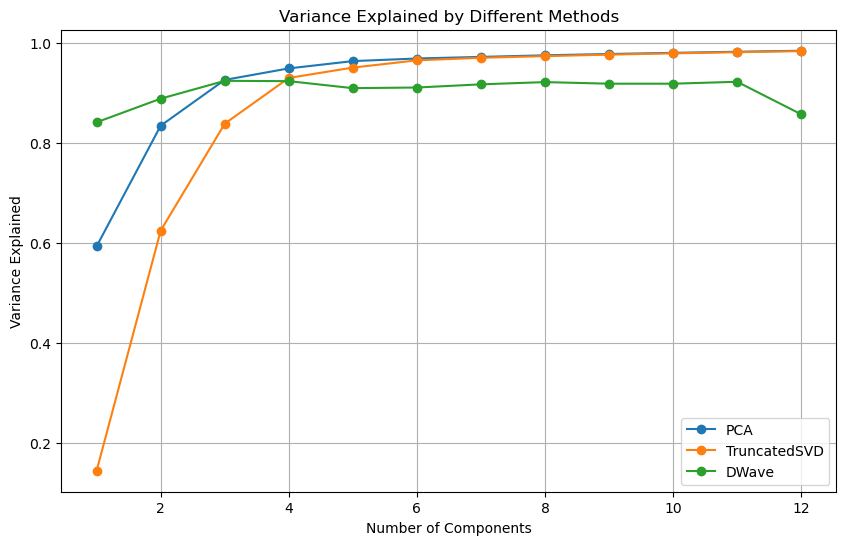

In [76]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from dwave.plugins.sklearn import SelectFromQuadraticModel


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_dense = X_imputed.toarray()

# Calculate variance explained for PCA
pca_variances = []
for n_components_pca in range(1, 13):
    pca = PCA(n_components=n_components_pca)
    pca.fit(X_imputed_dense)
    total_explained_variance = pca.explained_variance_ratio_.sum()
    pca_variances.append(total_explained_variance)

# Calculate variance explained for TruncatedSVD
svd_variances = []
for n_components in range(1, 13):
    svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
    svd.fit(X_imputed)
    cumulative_explained_variance_ratio = svd.explained_variance_ratio_.sum()
    svd_variances.append(cumulative_explained_variance_ratio)


    
# Plot the variance curves
components = list(range(1, 13))

plt.figure(figsize=(10, 6))
plt.plot(components, pca_variances, marker='o', label='PCA')
plt.plot(components, svd_variances, marker='o', label='TruncatedSVD')
plt.plot(components, var, marker='o', label='DWave')  

plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Different Methods')
plt.legend()
plt.grid()
plt.show()
